## Importing the dependencies

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv('iris.csv')

In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [32]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [53]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
        

In [55]:
# Instantiate the Model class using parameter defaults

torch.manual_seed(32)
model = Model()

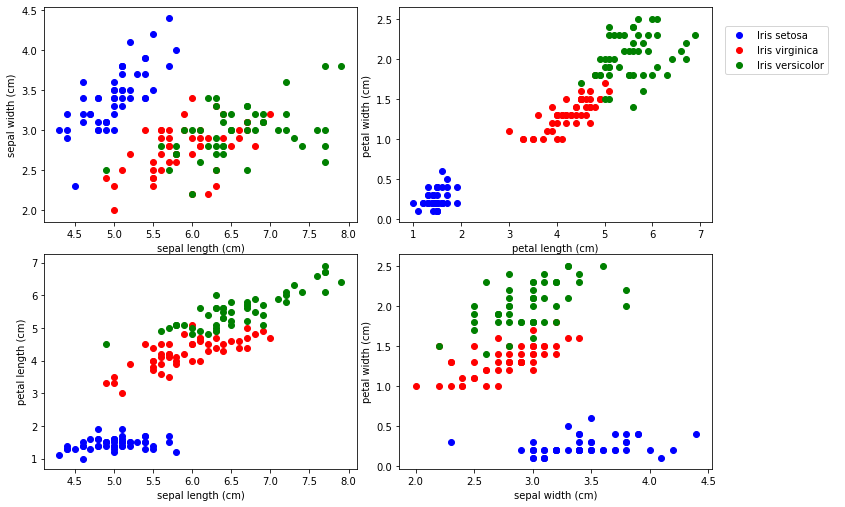

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [57]:
X = df.drop('target', axis = 1)
y = df['target']

In [58]:
X


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [59]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
120    2.0
121    2.0
122    2.0
123    2.0
124    2.0
125    2.0
126    2.0
127    2.0
128    2.0
129    2.0
130    2.0
131    2.0
132    2.0
133    2.0
134    2.0
135    2.0
136    2.0
137    2.0
138    2.0
139    2.0
140    2.0
141    2.0
142    2.0
143    2.0
144    2.0
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [61]:
# Convert into numpy arrays

X = df.drop('target',axis =1 ).values
y = df['target'].values

In [62]:
X.dtype


dtype('float64')

In [63]:
y.dtype

dtype('float64')

In [64]:
# Making a training and Test set


In [65]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [66]:
# make a variable called criterion to measure our error, Cross Entropy loss is one of the best for 
# classification data

criterion = nn.CrossEntropyLoss()

In [67]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [68]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [72]:
epochs = 100

losses = []

for i in range(epochs):
    i += 1
    # run forward and get a prediction
    
    y_pred = model.forward(X_train)
    
    # calculate the loss/error
    
    loss = criterion(y_pred,y_train)
    
    losses.append(loss)
    
    if i%5 == 0:
        print(f' Epoch {i} and loss is: {loss}')
        
    # Perform backproagation
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

 Epoch 5 and loss is: 0.06556909531354904
 Epoch 10 and loss is: 0.06387083977460861
 Epoch 15 and loss is: 0.06239526718854904
 Epoch 20 and loss is: 0.061095885932445526
 Epoch 25 and loss is: 0.0599399209022522
 Epoch 30 and loss is: 0.05890456214547157
 Epoch 35 and loss is: 0.05796904116868973
 Epoch 40 and loss is: 0.05711933597922325
 Epoch 45 and loss is: 0.056342389434576035
 Epoch 50 and loss is: 0.05562835559248924
 Epoch 55 and loss is: 0.05496843531727791
 Epoch 60 and loss is: 0.05435548350214958
 Epoch 65 and loss is: 0.05378355085849762
 Epoch 70 and loss is: 0.053247857838869095
 Epoch 75 and loss is: 0.05274425819516182
 Epoch 80 and loss is: 0.05226938799023628
 Epoch 85 and loss is: 0.05182031914591789
 Epoch 90 and loss is: 0.0513947419822216
 Epoch 95 and loss is: 0.05099058523774147
 Epoch 100 and loss is: 0.0506061352789402


Text(0.5, 0, 'Epoch')

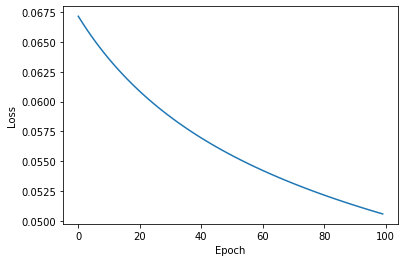

In [73]:
plt.plot(range(epochs),losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

## Evaluating on the test set

In [74]:

# turns off backpropagation
with torch.no_grad():
    y_eval = model.forward(X_test)
    
    loss = criterion(y_eval,y_test)
    
    
    

In [75]:
loss

tensor(0.0440)

In [82]:
correct = 0

with torch.no_grad():
    
    for i,data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1} : {str(y_val)} {y_test[i]}')
        
        if(y_val.argmax().item() == y_test[i]):
            correct += 1
            
print(f'We got correct: {correct}')

1 : tensor([-2.8205,  6.4803, -1.0145]) 1
2 : tensor([-2.4630,  7.1412, -1.8081]) 1
3 : tensor([  7.9814,   1.1886, -12.2241]) 0
4 : tensor([-4.8562,  6.3026,  1.3067]) 1
5 : tensor([-9.3934,  4.2225,  7.4338]) 2
6 : tensor([-13.4211,   1.8034,  12.8416]) 2
7 : tensor([  7.8054,   1.4258, -12.1862]) 0
8 : tensor([  8.7649,   1.0591, -13.1944]) 0
9 : tensor([-9.3691,  4.2262,  7.3250]) 2
10 : tensor([-12.0320,   3.1541,  10.7873]) 2
11 : tensor([-12.5736,   2.8315,  11.5023]) 2
12 : tensor([  7.9732,   0.9370, -11.9811]) 0
13 : tensor([-11.9959,   2.5438,  11.0148]) 2
14 : tensor([-4.8925,  6.0516,  1.4775]) 1
15 : tensor([-9.9068,  3.9488,  8.0440]) 2
16 : tensor([-2.4449,  6.9555, -1.6940]) 1
17 : tensor([-7.3145,  4.6211,  4.8814]) 2
18 : tensor([  8.9339,   1.0852, -13.4533]) 0
19 : tensor([-4.5849,  6.2573,  0.9688]) 1
20 : tensor([-10.1447,   4.6992,   7.8929]) 2
21 : tensor([  8.4227,   1.0925, -12.7492]) 0
22 : tensor([  9.1965,   1.2723, -13.9907]) 0
23 : tensor([-12.3266,   2.

In [83]:
# SO we got everything correct in our classification


## Saving the model

In [84]:
torch.save(model.state_dict(), 'iris_model.pt')

##  Loading new model

In [85]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

## Predicting with new data

In [86]:
new_data = torch.tensor([3.4,5.8,2.2,0.1])

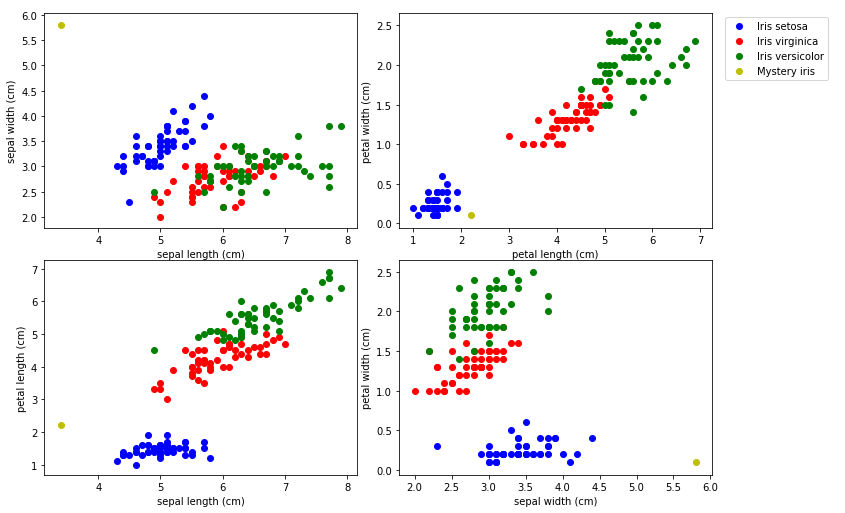

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(new_data[plots[i][0]],new_data[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [90]:
with torch.no_grad():
    print(new_model(new_data))
    print()
    print(labels[new_model(new_data).argmax()])

tensor([  9.0055,   1.0962, -13.5630])

Iris setosa
